In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
plt.style.use('seaborn-v0_8-darkgrid')

conn = sqlite3.connect('thyroid_data.db') # connect to db

  Family_History  Total_Patients  Malignant_Count  Malignancy_Rate
0             No          148866            28838            19.37
1            Yes           63825            20657            32.37

Malignancy rate WITH family history: 32.37%
Malignancy rate WITHOUT family history: 19.37%
Difference: 13.00 percentage points higher with family history


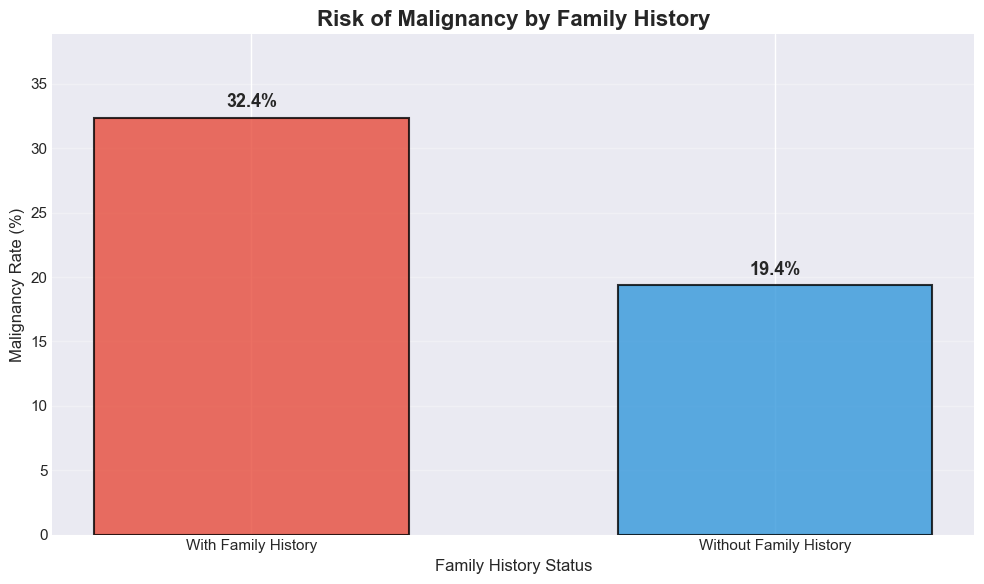

In [ ]:
# Visual 1 - Malignancy Rate by Family History

# Query: Calculate malignancy rate by family history
query = """
SELECT 
    Family_History,
    COUNT(*) as Total_Patients,
    SUM(CASE WHEN Diagnosis = 'Malignant' THEN 1 ELSE 0 END) as Malignant_Count,
    ROUND(100.0 * SUM(CASE WHEN Diagnosis = 'Malignant' THEN 1 ELSE 0 END) / COUNT(*), 2) as Malignancy_Rate
FROM patients
GROUP BY Family_History
"""

family_data = pd.read_sql_query(query, conn)
print(family_data)

# Get the rates
with_history = family_data[family_data['Family_History']=='Yes']['Malignancy_Rate'].values[0]
without_history = family_data[family_data['Family_History']=='No']['Malignancy_Rate'].values[0]

# Create bar chart
plt.figure(figsize=(10, 6))

categories = ['With Family History', 'Without Family History']
rates = [with_history, without_history]
colors = ['#e74c3c', '#3498db']

bars = plt.bar(categories, rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5, width=0.6)

plt.ylabel('Malignancy Rate (%)', fontsize=12)
plt.xlabel('Family History Status', fontsize=12)
plt.title('Risk of Malignancy by Family History', fontsize=16, fontweight='bold')
plt.ylim(0, max(rates) * 1.2)
plt.grid(True, alpha=0.3, axis='y')

# labels
for bar, rate in zip(bars, rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

   Gender  Patient_Count  Percentage
0  Female         127527       59.96
1    Male          85164       40.04


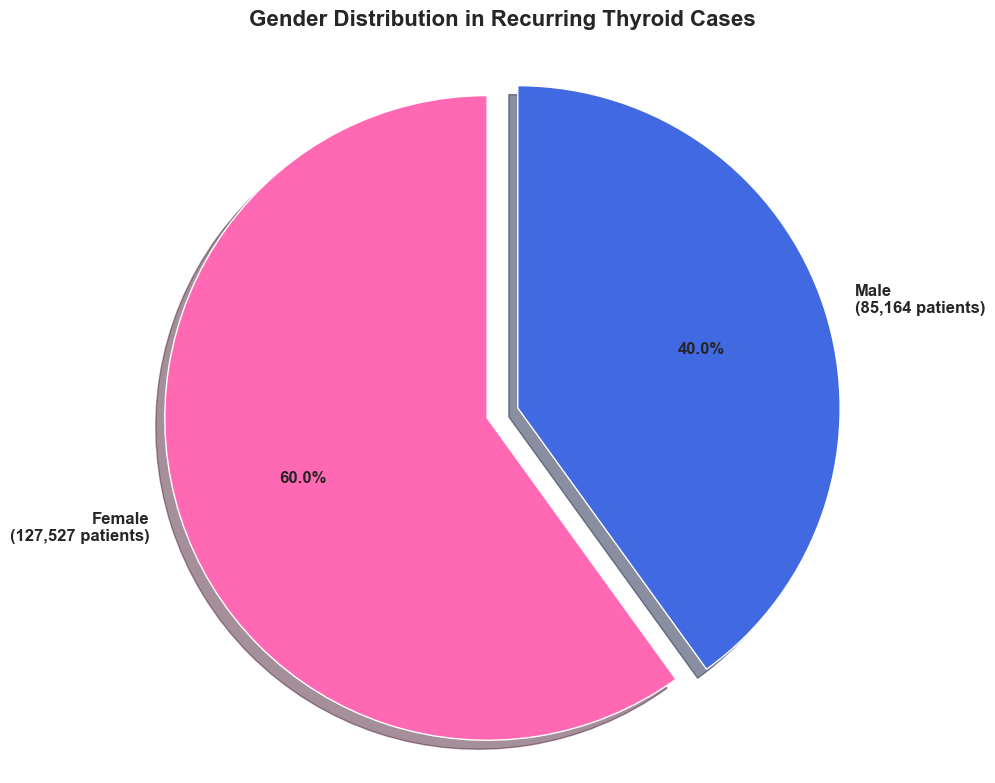

In [ ]:
# Visual 2 - proportion of recurring cases that are male vs female

# Query: Count patients by gender
query = """
SELECT 
    Gender,
    COUNT(*) as Patient_Count,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM patients), 2) as Percentage
FROM patients
GROUP BY Gender
"""

gender_data = pd.read_sql_query(query, conn)

# Create pie chart
plt.figure(figsize=(10, 8))

sizes = gender_data['Patient_Count'].values
labels = [f"{row['Gender']}\n({row['Patient_Count']:,} patients)" 
          for _, row in gender_data.iterrows()]
colors = ['#ff69b4', '#4169e1']  
explode = (0.05, 0.05) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Gender Distribution in Recurring Thyroid Cases Sampled', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
# visual 3

In [ ]:
# visual 4

In [31]:
# some analytics?? still not sure what he meant bc I only ever did pure visuals in the other class

# general
query = """
SELECT 
    COUNT(*) as Total_Patients,
    
    -- Diagnosis breakdown
    SUM(CASE WHEN Diagnosis = 'Malignant' THEN 1 ELSE 0 END) as Malignant_Count,
    SUM(CASE WHEN Diagnosis = 'Benign' THEN 1 ELSE 0 END) as Benign_Count,
    ROUND(100.0 * SUM(CASE WHEN Diagnosis = 'Malignant' THEN 1 ELSE 0 END) / COUNT(*), 2) as Malignancy_Rate,
    
    -- Demographics
    ROUND(AVG(Age), 1) as Avg_Age,
    MIN(Age) as Min_Age,
    MAX(Age) as Max_Age,
    
    -- Lab values
    ROUND(AVG(TSH_Level), 2) as Avg_TSH,
    ROUND(AVG(T3_Level), 2) as Avg_T3,
    ROUND(AVG(T4_Level), 2) as Avg_T4,
    ROUND(AVG(Nodule_Size), 2) as Avg_Nodule_Size,
    
    -- Risk factors prevalence
    ROUND(100.0 * SUM(CASE WHEN Family_History = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 1) as Pct_Family_History,
    ROUND(100.0 * SUM(CASE WHEN Radiation_Exposure = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 1) as Pct_Radiation,
    ROUND(100.0 * SUM(CASE WHEN Smoking = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 1) as Pct_Smoking,
    ROUND(100.0 * SUM(CASE WHEN Obesity = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 1) as Pct_Obesity,
    ROUND(100.0 * SUM(CASE WHEN Diabetes = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 1) as Pct_Diabetes
FROM patients
"""

summary = pd.read_sql_query(query, conn)
print("=== GENERAL ANALYTICS SUMMARY ===\n")
print(summary.T)  

#geo distribution
query = """
SELECT 
    Country,
    COUNT(*) as Total_Patients,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM patients), 1) as Pct_of_Total,
    SUM(CASE WHEN Diagnosis = 'Malignant' THEN 1 ELSE 0 END) as Malignant_Cases,
    ROUND(100.0 * SUM(CASE WHEN Diagnosis = 'Malignant' THEN 1 ELSE 0 END) / COUNT(*), 1) as Malignancy_Rate
FROM patients
GROUP BY Country
ORDER BY Total_Patients DESC
"""

country_analytics = pd.read_sql_query(query, conn)
print("\n=== GEOGRAPHIC DISTRIBUTION ===")
print(country_analytics)

# diagnosis
query = """
SELECT Diagnosis, COUNT(*) as Count, 
       ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM patients), 1) as Percentage
FROM patients GROUP BY Diagnosis
"""
diag = pd.read_sql_query(query, conn)
print("\n=== DIAGNOSIS ===")
for _, row in diag.iterrows():
    print(f"  {row['Diagnosis']}: {row['Count']:,} ({row['Percentage']}%)")

=== GENERAL ANALYTICS SUMMARY ===

                            0
Total_Patients      212691.00
Malignant_Count      49495.00
Benign_Count        163196.00
Malignancy_Rate         23.27
Avg_Age                 51.90
Min_Age                 15.00
Max_Age                 89.00
Avg_TSH                  5.05
Avg_T3                   2.00
Avg_T4                   8.25
Avg_Nodule_Size          2.50
Pct_Family_History      30.00
Pct_Radiation           15.00
Pct_Smoking             19.90
Pct_Obesity             30.00
Pct_Diabetes            20.00

=== GEOGRAPHIC DISTRIBUTION ===
       Country  Total_Patients  Pct_of_Total  Malignant_Cases  Malignancy_Rate
0        India           42496          20.0            13976             32.9
1        China           31978          15.0             6698             20.9
2      Nigeria           31918          15.0             6712             21.0
3       Brazil           21413          10.1             4479             20.9
4       Russia           21

In [38]:
# metadata

query = "SELECT * FROM patients"
meta = pd.read_sql_query(query, conn)

# Get the info
print("=== DATASET METADATA (data.info()) ===\n")
meta.info()

# export to json 
import json
import io

# Capture info() output
buffer = io.StringIO()
meta.info(buf=buffer)
info_output = buffer.getvalue()

# Get column information
columns_metadata = []
for col in meta.columns:
    col_info = {
        "name": col,
        "dtype": str(meta[col].dtype),
        "non_null_count": int(meta[col].count()),
        "null_count": int(meta[col].isnull().sum()),
        "unique_values": int(meta[col].nunique())
    }
    
    # Add min/max/mean for numeric columns
    if meta[col].dtype in ['int64', 'float64']:
        col_info["min"] = float(meta[col].min())
        col_info["max"] = float(meta[col].max())
        col_info["mean"] = float(meta[col].mean())
    
    columns_metadata.append(col_info)

# Create metadata object
metadata = {
    "dataset_name": "Thyroid Cancer Risk Data",
    "total_records": len(meta),
    "total_columns": len(meta.columns),
    "memory_usage_mb": round(meta.memory_usage(deep=True).sum() / (1024 * 1024), 2),
    "columns": columns_metadata,
    "info_output": info_output,
    "generated_at": pd.Timestamp.now().isoformat()
}

# Save to JSON
with open('thyroid_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

=== DATASET METADATA (data.info()) ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 

In [ ]:
# export analytics to json so we can use in FE - also the images are saved 
# (i removed the print lines so they wouldnt keep getting saved) 
# put them in public folder

import json

# 1. Summary Statistics
summary_dict = summary.to_dict('records')[0]

# 2. Geogrpahic Analysis
geo_data_dict = country_analytics.to_dict('records')

# 3. Gender Distribution
gender_dict = gender_data.to_dict('records')

# 4. Country Analytics
country_dict = country_analytics.to_dict('records')

# DIagnosis Analytivs
diagnosis_dict = diag.to_dict('records')


# Create master analytics object
dashboard_analytics = {
    "summary": summary_dict,
    "geo_analysis": geo_data_dict,
    "gender_distribution": gender_dict,
    "country_analysis": country_dict,
    "diagnosis_analytics": diagnosis_dict,
    "generated_at": pd.Timestamp.now().isoformat()
}

# Save to JSON
with open('thyroid_analytics.json', 'w') as f:
    json.dump(dashboard_analytics, f, indent=2)

